In [234]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(suppress=True)

# Minimos cuadrados

Supongamos que tenemos un conjunto de $n$ datos $(X, Y)$, donde $Y$ es un vector de $n$ observaciones $y^{[i]}$, y $X$ es una matriz con $n$ filas y $m$ columnas. La $i$-ésima fila contiene las $m$ características del dato $x^{[i]}$. Queremos hacer un modelo $f(x, \beta)$, el cual nos permita conocer el valor de un $x$ desconocido, suponiendo que proviene de la misma distribución del conjunto de datos $(X, Y)$. Además, queremos que el modelo pueda ser "ajustado" a partir de un vector de parámetros $\beta$. El objetivo es encontar el vector de parámetros $\beta$ que mejor se ajuste a los datos. Esto es, para un $x^{[i]}$ del conjunto de datos, queremos minimizar la diferencia $r^{[i]}$ entre el valor $f(x^{[i]}, \beta)$ arrojado por el modelo y las observaciones reales $y^{[i]}$:

$$r^{[i]} = y^{[i]} - f(x^{[i]}, \beta)$$

El método de mínimos cuadrados encuentra el $\beta$ óptimo minimizando la suma de los residuos al cuadrado:

$$S = \sum_{i = 1}^n (r^{[i]})^2$$

Definamos el modelo $f(x, \beta)$ como un modelo lineal de la siguiente forma:

$$f(x, \beta) = \beta_0 + x_1\beta_1 + ... + x_n\beta_n.$$

Para escribir la definición del modelo de manera matricial, añadamos una entrada extra a cada vector de características, de tal manera que $x^{[i]} = [1, x^{[i]}_1, ..., x^{[i]}_n]$. Con esto, el producto matricial $X\beta$ corresponde a un vector de $n$ entradas, tal que en la $i$-ésima entrada se encuentra el valor de $f(x^{[i]}, \beta)$. Notemos que la suma $S$ de residuos cuadráticos se interpreta como la suma de las entradas de $Y - X\beta$ al cuadrado. Esto precisamente la diferencia euclidiana entre el vector $Y$ y el vector $X\beta$ al cuadrado. 

$$S = ||Y - X\beta ||_2^2,$$

y de esta forma el objetivo es entonces encontrar un $\beta$ que minimice tal diferencia. El vector $X\beta$ se encuentra en el espacio columna de $X$, de lo que se sigue que  $X\beta$ debe ser la proyección ortogonal de $Y$ sobre el espacio columna de $X$, para que la distancia de $X\beta$ a $Y$ sea mínima. En otras palabras, $Y - X\beta$ debe ser ortogonal al espacio columna de $X$. A continuación hay una representación gráfica la situación descrita anteriormente. 







Producto punto del residuo con la base 1: 0.00 (debe ser ~0 si son ortogonales)
Producto punto del residuo con la base 2: 0.00 (debe ser ~0 si son ortogonales)


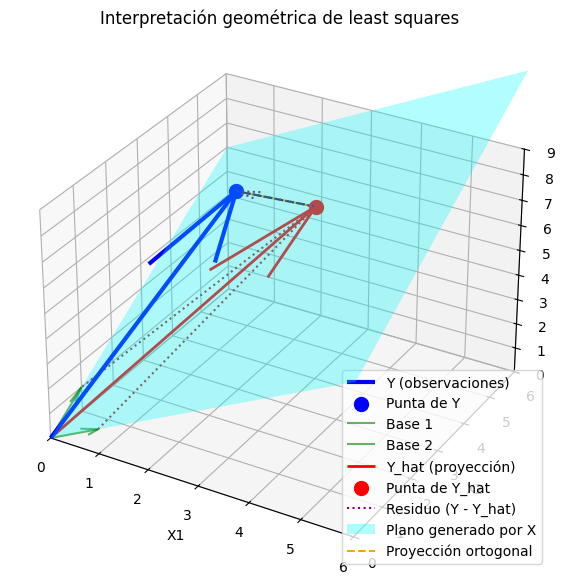

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generar datos
np.random.seed(42)
Y = np.array([2, 3, 8])  # Vector de observaciones (fuera del plano generado por X)
X = np.array([[1, 0], [0, 1], [1, 1]])  # Matriz de diseño (columnas son bases del subespacio)

# Calcular la solución de mínimos cuadrados
XtX_inv = np.linalg.inv(X.T @ X)
projection_matrix = X @ XtX_inv @ X.T
Y_hat = projection_matrix @ Y  # Proyección de Y sobre el subespacio columna de X

# Calcular el vector de error (residuales)
residual = Y - Y_hat

# Verificar ortogonalidad
for i in range(X.shape[1]):
    base_vector = X[:, i]
    dot_product = np.dot(residual, base_vector)
    print(f"Producto punto del residuo con la base {i + 1}: {dot_product:.2f} (debe ser ~0 si son ortogonales)")

# Definir un plano basado en las columnas de X
x = np.linspace(0, 6, 10)
y = np.linspace(0, 6, 10)
x_grid, y_grid = np.meshgrid(x, y)
z_grid = (X[:, 0][2] / X[:, 0][0]) * x_grid + (X[:, 1][2] / X[:, 1][1]) * y_grid  # Plano generado por X

# Visualización
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Origen
origin = np.array([0, 0, 0])

# Dibujar el vector Y
ax.quiver(*origin, *Y, color='b', label='Y (observaciones)', linewidth=3)
ax.scatter(*Y, color='b', s=100, label='Punta de Y')  # Punto final de Y

# Dibujar las columnas de X (bases del subespacio)
for i in range(X.shape[1]):
    ax.quiver(*origin, *X[:, i], color='g', alpha=0.6, label=f'Base {i + 1}')

# Dibujar la proyección Y_hat
ax.quiver(*origin, *Y_hat, color='r', label='Y_hat (proyección)', linewidth=2)
ax.scatter(*Y_hat, color='r', s=100, label='Punta de Y_hat')

# Dibujar el vector residual
ax.quiver(*Y_hat, *residual, color='purple', linestyle='dotted', label='Residuo (Y - Y_hat)')

# Dibujar el plano generado por las columnas de X
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.3, color='cyan', rstride=100, cstride=100, label='Plano generado por X')

# Dibujar la proyección ortogonal de Y sobre el plano
ax.plot([Y[0], Y_hat[0]], [Y[1], Y_hat[1]], [Y[2], Y_hat[2]], color='orange', linestyle='--', label='Proyección ortogonal')

# Resaltar ortogonalidad
for i in range(X.shape[1]):
    base_vector = X[:, i]
    base_tip = origin + base_vector
    ax.plot([Y_hat[0], Y_hat[0] + residual[0]], 
            [Y_hat[1], Y_hat[1] + residual[1]], 
            [Y_hat[2], Y_hat[2] + residual[2]], color='k', alpha=0.6, linestyle='dashed')
    ax.plot([Y_hat[0], base_tip[0]], 
            [Y_hat[1], base_tip[1]], 
            [Y_hat[2], base_tip[2]], color='brown', linestyle=':')

# Configuración del gráfico
ax.set_xlim(0, max(Y[0], 6))
ax.set_ylim(0, max(Y[1], 6))
ax.set_zlim(0, max(Y[2], 9))  # Ajuste del límite para incluir la nueva altura de Y
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Interpretación geométrica de least squares')
ax.legend()

plt.show()


En símbolos

$$X^T(Y - X\beta) = 0.$$

Operando esta expresión para despejar $\beta$ obtenemos

$$X^TY - X^TX\beta = 0$$

$$X^TX\beta  = X^TY$$

Suponiendo que $X^TX$ es invertible, tenemos que

$$\beta = (X^TX)^{-1}X^TY.$$

La anterior se conoce como la ecuación normal de mínimos cuadrados, por lo que podemos obtener una solución única para el problema de minimización, siempre que $(X^TX)$ sea invertible. Si $X$ fuese invertible, entonces podríamos encontrar una solución tal que $||Y - X\beta ||_2^2 = 0$, pero esto raramente sucede. Para que $(X^TX)$ sea invertible, necesitamos que las columnas y las filas de $X$ sean linealmente independiente. Esto puede fallar si las características tienen relaciones lineales entre si (en este caso, las columnas son linealmente dependientes) o si hay relaciones lineales entre los datos (en este caso, las filas son linealmente dependientes). En cualquiera de los dos casos, el núcleo sería no trivial, por lo que existiría un vector no nulo $v$ tal que $Xv = 0$, y por lo tanto $X^TXv = 0$, por lo que $X^TX$ no sería invertible.


## Ejemplo

A continuación, realizamos una implementación del método de mínimos cuadrados. Empezamos una matriz de diseño $X$ y un vector de observaciones $Y$. 


In [235]:
# Generar datos
Y = np.array([2, 3, 5, 10, 11, 15, 14])  # Vector de observaciones
Y = Y[:, np.newaxis]

X = np.array([  
    [0],
    [1],
    [4],
    [6],        # Matriz de diseño
    [8],
    [9],
    [10]
])

Ahora, graficamos estos puntos en plano. Notemos que obedecen una relación lineal.

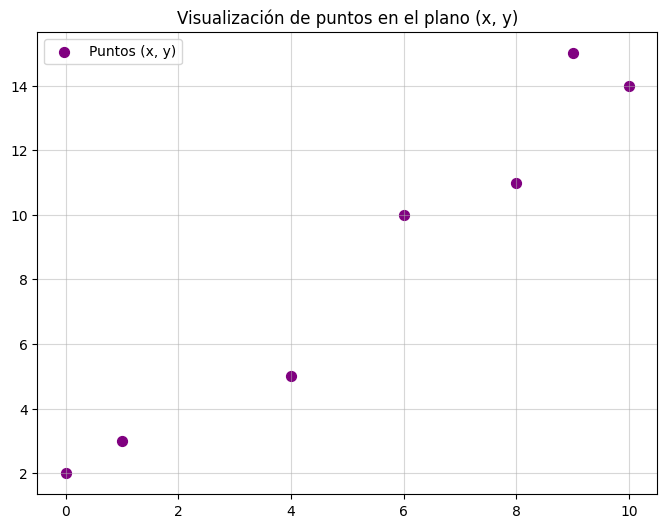

In [236]:
# Crear puntos (x, y) en el plano
points_x = X.flatten()  # Extraer coordenadas x
points_y = Y  # Coordenadas y correspondientes

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(points_x, points_y, color='purple', label='Puntos (x, y)', s=50, )
# Configuración del gráfico

plt.grid(alpha=0.5)
plt.title('Visualización de puntos en el plano (x, y)')
plt.legend()
plt.show()

Para escribir el producto de forma matricial, primero convertimos $X$ a la forma correcta añadiendo una columna de $1$'s. 

In [237]:
X_ = np.concatenate((np.ones((7, 1)), X), axis=1)
X_

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  4.],
       [ 1.,  6.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

Ahora, definimos la función para el modelo, la cual recibe un vector de parámetros y devuelve la predicción.

In [238]:
def model(x, beta):
    return x @ beta

Veamos un ejemplo para un vector de parámetros $\beta = [-1, -1]$.

In [239]:
beta =  -np.ones((2, 1))

print(f'X = \n{X_}')
print(f'\nβ = \n{beta}')
print(f'\nXβ = \n{model(X_, beta)}')

X = 
[[ 1.  0.]
 [ 1.  1.]
 [ 1.  4.]
 [ 1.  6.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]

β = 
[[-1.]
 [-1.]]

Xβ = 
[[ -1.]
 [ -2.]
 [ -5.]
 [ -7.]
 [ -9.]
 [-10.]
 [-11.]]


Hallemos el $\beta$ que reduce la distancia entre $Y$ y $X\beta$ mediante las ecuaciones normales:

In [240]:
def train(X, Y):

    XtX_inv = np.linalg.inv(X.T @ X)
    return XtX_inv @ X.T @ Y

beta = train(X_, Y)

Comprobemos que $Y - X\beta$ es ortogonal al espacio columna de $X$:

In [241]:
X_.T @ (Y - X_ @ beta)

array([[-0.],
       [-0.]])

El vector de predicciónes se interpreta como el intercepto y la pendiente de una recta:

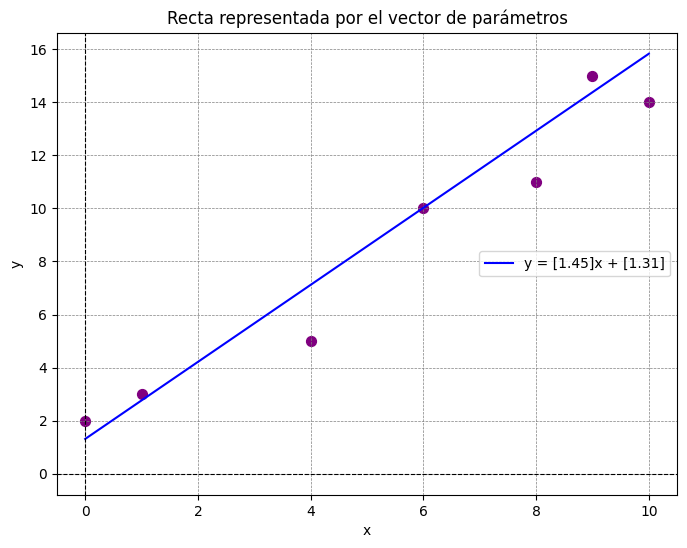

In [242]:
x = np.linspace(0, 10, 100)  # Rango de valores de x
# Calcular valores de y
m, b = beta[0], beta[1]
y = m * x + b

# Graficar la recta
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'y = {m}x + {b}', color='b')
plt.axhline(0, color='black',linewidth=0.8, linestyle="--")  # Eje x
plt.axvline(0, color='black',linewidth=0.8, linestyle="--")  # Eje y
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Recta representada por el vector de parámetros')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.scatter(points_x, points_y, color='purple', label='Puntos (x, y)', s=50)
plt.show()

points_x = X.flatten()  # Extraer coordenadas x
points_y = Y  # Coordenadas y correspondientes

# Visualización



Vemos que el la linea dada se adecua muy bien a los datos, y por lo tanto la podemos utilizar para realizar predicciones sobre valores desconocidos (supiendo que la distribución realmente si tiene una estructura lineal). ¿Que pasa si la estructura de los datos es otra?. Recordemos que el modelo realiza una predición partir del vector de parámetros como

$$f(x, \beta) = \beta_0 + \sum_{i = 1}^n \beta _i x_i$$

Si sabemos que en la coordenada $x_i$, el modelo obedece una relación *polinomial* con respecto a $x_i$, digamos el proceso generador de datos mapea $x_1 \rightarrow (ax_1^2 + bx_1)$, podemos añadir está relación al modelo:

$$f(x, \beta) = \beta_0 + \beta _{n+1}x_1^2  + \sum_{i = 1}^n \beta _i x_i.$$

Veamos casos en el que hacer esta modificación al modelo es util. Primero, creamos una función que nos permita generar datos en el plano a partir de la función que queramos. La función escoge aleatoriamente $n$ puntos en el rango escogido, y les aplica un ruido muestreado de una distribución normal.

In [243]:
import numpy as np

def gen_data(n, i, j, f):
    # Generate n random samples in the range [i, j)
    X = np.random.uniform(i, j, n)
    
    # Add noise to the function f(x)
    f_noisy = lambda x: f(x) + np.random.normal(0, 0.1)  # Adjust noise level as needed
    
    # Apply the noisy function to X to generate Y
    Y = np.array([f_noisy(x) for x in X])
    
    return X, Y


En el siguiente ejemplo, generamos un conjunto de datos generados aleatoriamente vía la función $h(x) = x^3 - 3x$.

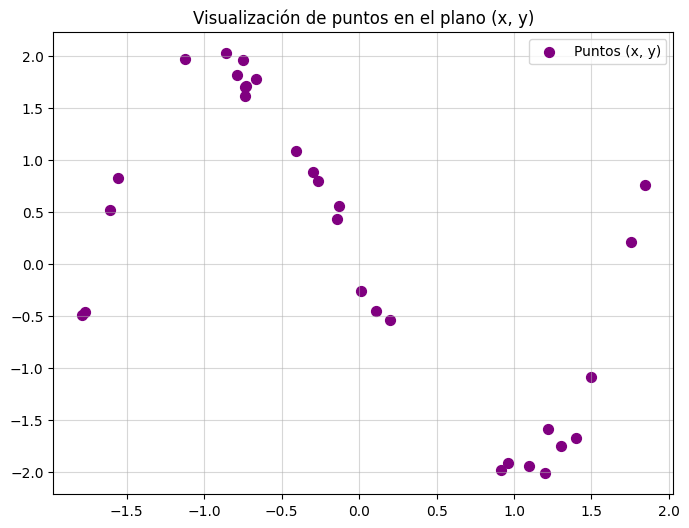

In [244]:
X, Y = gen_data(30, -2, 2, lambda x: x**3 - 3*x)

# Crear puntos (x, y) en el plano
points_x = X.flatten()  # Extraer coordenadas x
points_y = Y  # Coordenadas y correspondientes

plt.figure(figsize= (8, 6))
plt.scatter(points_x, points_y, color='purple', label='Puntos (x, y)', s=50, )
plt.grid(alpha=0.5)
plt.title('Visualización de puntos en el plano (x, y)')
plt.legend()
plt.show()



Si supieramos a priori que el conjunto de datos obedece esta relación, nuestro objetivo sería hallar los parámetros del mejor modelo de la forma

$$f(x, \beta) = \beta _0x^3 + \beta _1x.$$

Para esto, modificamos la matriz de diseño y usamos las ecuaciones normales:

In [245]:
def create_feature_matrix(X, functions, base_column=None):
    X = X.reshape(-1, 1)
    
    feature_columns = [f(X) for f in functions]
    
    # Concatenate the base column if provided, else just use the feature columns
    if base_column is not None:
        base_column = base_column.reshape(-1, 1)  # Ensure the base column is 2D
        matrix = np.concatenate([base_column] + feature_columns, axis=1)
    else:
        matrix = np.concatenate(feature_columns, axis=1)
    
    return matrix

X_ = create_feature_matrix(X, [lambda x: x**3, lambda x: x])

beta = train(X_, Y)

In [248]:
beta

array([ 1.02, -3.01])

Veamos como se ajusta el modelo a los datos

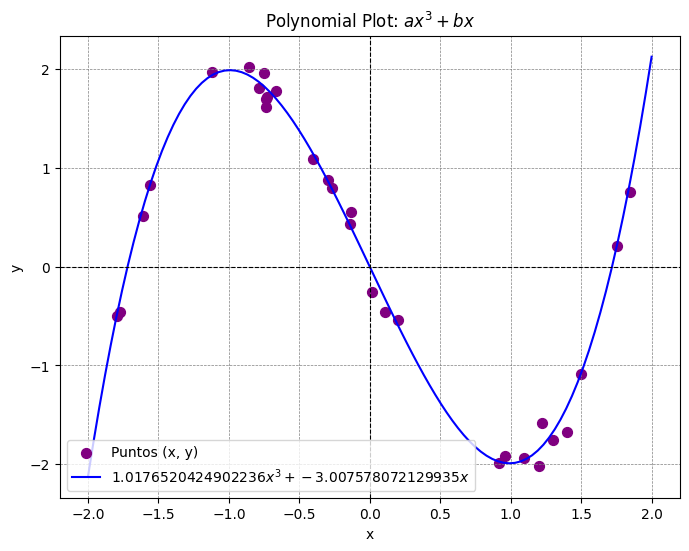

In [249]:
import numpy as np
import matplotlib.pyplot as plt

x_range=(-2, 2)
num_points=100
x = np.linspace(x_range[0], x_range[1], num_points)

# Compute y values using the polynomial
y = beta[0] * x**3 + beta[1] * x

# Plot the polynomial
plt.figure(figsize=(8, 6))
plt.scatter(points_x, points_y, color='purple', label='Puntos (x, y)', s=50, )
plt.plot(x, y, label=f"${beta[0]}x^3 + {beta[1]}x$", color='blue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add x-axis
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add y-axis
plt.title("Polynomial Plot: $ax^3 + bx$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


Notemos que hemos encontrado un modelo que se adecua bien los datos. En general, podemos hacer cualquier tipo de modelo de la forma

$$f(x, \beta) = \sum_{i=1}^{n}\beta _i h_i(x_i),$$

donde $h_i$ es cualquier función. De cierta forma, estamos estableciendo el conjunto de funciones que puede representar el modelo. Las ecuaciónes normales aún siguen funcionando, ya que lo que importa es que el modelo sea lineal *en los parámetros*.

No solo podemos modificarlos: también podemos hacer un proceso de "data-augmentation" y *añadir* nuevas características a cada vector, añadiendo más columnas, efectivamente enriqueciendo el conjunto de funciones que el modelo puede representar. Esto es especialemente útil en casos en los que sabemos algo sobre el proceso generador de datos.

 Si enriquecemos demasiado el conjunto de funciones estamos añadiendo columnas a la matriz de diseño. Si tenemos más columnas que filas, es decir, más características que datos, entonces las columnas de $X$ son linealmente dependientes y por lo tanto $X^TX$ deja de ser invertible, por lo que perdemos la solución única: le hemos otorgado al modelo demasiada versatilidad. Podemos añadir más datos para que las columnas dejen de ser linealmente dependientes, o usar métodos de regularización para hacer tender al modelo hacia ciertas soluciones.

 Concluimos que el resultado principal es el siguiente: _El método de mínimos cuadrados permite interpolar cualquier combinación lineal de funciones. Se tienen solución única si:  1. Tenemos al menos tantos datos como funciones. 2. Las funciones no tienen relaciones lineales entre si 3. Los datos no tienen relaciones lineales entre si_